In [1]:
#import usful libaries
import pandas as pd
import numpy as np
import sklearn
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
import warnings
import random
warnings.filterwarnings("ignore")


In [2]:
# Set the random seed for NumPy
np.random.seed(42)

# Set the random seed for Python's built-in random module
random.seed(42)

# Set the random seed for scikit-learn
sklearn.utils.check_random_state(42)

RandomState(MT19937) at 0x1DB13E7E040

In [3]:
# Load the dataset
df = pd.read_csv('Cleaned_NBA_Player_Stats1.csv', encoding = 'utf-8')
df.head()


,Unnamed: 0,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,...,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,Season,MVP
0,0,Mahmoud Abdul-Rauf,PG,28,SAC,31,0,17.1,3.3,8.8,...,1.0,1.2,1.9,0.5,0.0,0.6,1.0,7.3,1997,0
1,1,Tariq Abdul-Wahad,SG,23,SAC,59,16,16.3,2.4,6.1,...,1.2,2.0,0.9,0.6,0.2,1.1,1.4,6.4,1997,0
2,2,Shareef Abdur-Rahim,SF,21,VAN,82,82,36.0,8.0,16.4,...,4.3,7.1,2.6,1.1,0.9,3.1,2.5,22.3,1997,0
3,3,Cory Alexander,PG,24,TOT,60,22,21.6,2.9,6.7,...,2.2,2.4,3.5,1.2,0.2,1.9,1.6,8.1,1997,0
4,6,Ray Allen*,SG,22,MIL,82,82,40.1,6.9,16.0,...,3.4,4.9,4.3,1.4,0.1,3.2,3.0,19.5,1997,0


In [4]:
#filter out players that played less than half of games and minutes per game
df_filter1 = df[(df["G"] > 41) & (df["MP"] > 24)]
df_filter1.head()


,Unnamed: 0,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,...,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,Season,MVP
2,2,Shareef Abdur-Rahim,SF,21,VAN,82,82,36.0,8.0,16.4,...,4.3,7.1,2.6,1.1,0.9,3.1,2.5,22.3,1997,0
4,6,Ray Allen*,SG,22,MIL,82,82,40.1,6.9,16.0,...,3.4,4.9,4.3,1.4,0.1,3.2,3.0,19.5,1997,0
5,7,Derek Anderson,SF,23,CLE,66,13,27.9,3.6,8.9,...,2.0,2.8,3.4,1.3,0.2,1.9,2.1,11.7,1997,0
7,9,Kenny Anderson,PG,27,TOT,61,56,30.5,4.4,11.0,...,2.2,2.8,5.7,1.4,0.0,2.3,2.2,12.2,1997,0
8,12,Nick Anderson,SF,30,ORL,58,44,29.3,5.9,13.0,...,3.4,5.1,2.1,1.2,0.4,1.5,1.7,15.3,1997,0


In [5]:
#set up new df and drop teams and position as these should not have any effect
df1 = pd.DataFrame(df_filter1)
df1.drop(columns = ['Tm', 'Pos'], inplace = True)
#check head
df1.head()

,Unnamed: 0,Player,Age,G,GS,MP,FG,FGA,FG%,3P,...,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,Season,MVP
2,2,Shareef Abdur-Rahim,21,82,82,36.0,8.0,16.4,0.485,0.3,...,4.3,7.1,2.6,1.1,0.9,3.1,2.5,22.3,1997,0
4,6,Ray Allen*,22,82,82,40.1,6.9,16.0,0.428,1.6,...,3.4,4.9,4.3,1.4,0.1,3.2,3.0,19.5,1997,0
5,7,Derek Anderson,23,66,13,27.9,3.6,8.9,0.408,0.3,...,2.0,2.8,3.4,1.3,0.2,1.9,2.1,11.7,1997,0
7,9,Kenny Anderson,27,61,56,30.5,4.4,11.0,0.398,0.9,...,2.2,2.8,5.7,1.4,0.0,2.3,2.2,12.2,1997,0
8,12,Nick Anderson,30,58,44,29.3,5.9,13.0,0.455,1.3,...,3.4,5.1,2.1,1.2,0.4,1.5,1.7,15.3,1997,0


In [6]:
#check tail
df1.tail()

,Unnamed: 0,Player,Age,G,GS,MP,FG,FGA,FG%,3P,...,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,Season,MVP
11680,14546,Grant Williams,23,77,21,24.4,2.7,5.6,0.475,1.4,...,2.7,3.6,1.0,0.5,0.7,0.8,2.4,7.8,2021,0
11684,14550,Robert Williams,24,61,61,29.6,4.4,6.0,0.736,0.0,...,5.7,9.6,2.0,0.9,2.2,1.0,2.2,10.0,2021,0
11690,14558,Christian Wood,26,68,67,30.8,6.5,12.9,0.501,1.9,...,8.5,10.1,2.3,0.8,1.0,1.9,2.5,17.9,2021,0
11697,14569,Trae Young,23,76,76,34.9,9.4,20.3,0.460,3.1,...,3.1,3.7,9.7,0.9,0.1,4.0,1.7,28.4,2021,0
11700,14572,Ivica Zubac,24,76,76,24.4,4.1,6.5,0.626,0.0,...,5.6,8.5,1.6,0.5,1.0,1.5,2.7,10.3,2021,0


In [7]:
#check nulls
df1.isnull().sum()

Unnamed: 0      0
Player          0
Age             0
G               0
GS              0
MP              0
FG              0
FGA             0
FG%             0
3P              0
3PA             0
3P%           171
2P              0
2PA             0
2P%             0
eFG%            0
FT              0
FTA             0
FT%             0
ORB             0
DRB             0
TRB             0
AST             0
STL             0
BLK             0
TOV             0
PF              0
PTS             0
Season          0
MVP             0
dtype: int64

In [8]:
#dtop nulls
df1.dropna(inplace = True)
df1.isnull().sum()

Unnamed: 0    0
Player        0
Age           0
G             0
GS            0
MP            0
FG            0
FGA           0
FG%           0
3P            0
3PA           0
3P%           0
2P            0
2PA           0
2P%           0
eFG%          0
FT            0
FTA           0
FT%           0
ORB           0
DRB           0
TRB           0
AST           0
STL           0
BLK           0
TOV           0
PF            0
PTS           0
Season        0
MVP           0
dtype: int64

In [9]:
#check info
df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3820 entries, 2 to 11697
Data columns (total 30 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  3820 non-null   int64  
 1   Player      3820 non-null   object 
 2   Age         3820 non-null   int64  
 3   G           3820 non-null   int64  
 4   GS          3820 non-null   int64  
 5   MP          3820 non-null   float64
 6   FG          3820 non-null   float64
 7   FGA         3820 non-null   float64
 8   FG%         3820 non-null   float64
 9   3P          3820 non-null   float64
 10  3PA         3820 non-null   float64
 11  3P%         3820 non-null   float64
 12  2P          3820 non-null   float64
 13  2PA         3820 non-null   float64
 14  2P%         3820 non-null   float64
 15  eFG%        3820 non-null   float64
 16  FT          3820 non-null   float64
 17  FTA         3820 non-null   float64
 18  FT%         3820 non-null   float64
 19  ORB         3820 non-null   flo

In [10]:
#check df1 statistics
df1.describe()

,Unnamed: 0,Age,G,GS,MP,FG,FGA,FG%,3P,3PA,...,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,Season,MVP
count,3820.000000,3820.000000,3820.000000,3820.000000,3820.000000,3820.000000,3820.000000,3820.000000,3820.000000,3820.000000,...,3820.000000,3820.000000,3820.000000,3820.000000,3820.000000,3820.000000,3820.000000,3820.000000,3820.000000,3820.000000
mean,7020.438743,26.847644,70.428534,56.570157,31.328586,5.323351,11.685000,0.455451,1.081021,2.985733,...,4.035079,5.311702,3.295942,1.031257,0.573639,1.905419,2.388455,14.424372,2009.330628,0.006545
std,4113.043725,4.067682,10.730109,22.474437,4.397269,1.844555,3.854029,0.047081,0.847184,2.184734,...,1.795910,2.542429,2.074705,0.410445,0.555200,0.750780,0.583333,5.202144,7.147923,0.080644
min,2.000000,19.000000,42.000000,0.000000,24.100000,1.300000,3.400000,0.327000,0.000000,0.000000,...,0.900000,1.200000,0.200000,0.200000,0.000000,0.400000,0.800000,3.600000,1997.000000,0.000000
25%,3451.500000,24.000000,64.000000,43.000000,27.600000,3.900000,8.700000,0.423000,0.300000,1.000000,...,2.700000,3.300000,1.700000,0.700000,0.200000,1.300000,2.000000,10.500000,2003.000000,0.000000
50%,6880.500000,27.000000,73.000000,62.000000,31.100000,5.000000,11.100000,0.449000,1.100000,3.000000,...,3.600000,4.600000,2.700000,1.000000,0.400000,1.800000,2.400000,13.500000,2009.000000,0.000000
75%,10534.000000,30.000000,80.000000,76.000000,34.800000,6.500000,14.200000,0.480000,1.600000,4.500000,...,5.000000,6.800000,4.400000,1.300000,0.700000,2.400000,2.800000,17.600000,2016.000000,0.000000
max,14569.000000,40.000000,85.000000,83.000000,43.700000,12.200000,27.800000,0.736000,5.300000,13.200000,...,11.400000,16.000000,11.700000,2.900000,3.900000,5.700000,4.500000,36.100000,2021.000000,1.000000


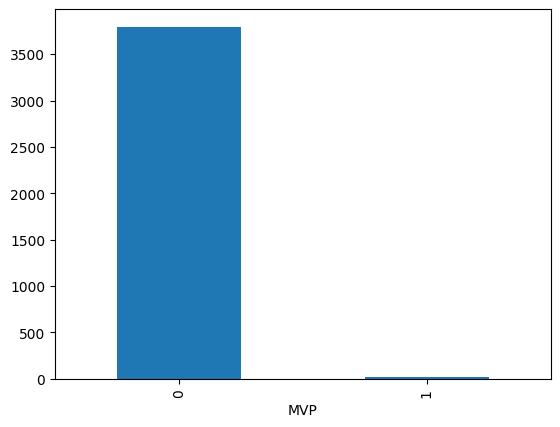

In [11]:
# check how the data distribution between the two classes look. We can see that there is a lot more data on non-MVP players
df1.groupby('MVP')['PTS'].count().plot(kind='bar')
plt.show()

In [12]:
#finding all the player names, to covert them to unique numbers
names = df1['Player'].unique()
names

array(['Shareef Abdur-Rahim', 'Ray Allen*', 'Derek Anderson',
       'Kenny Anderson', 'Nick Anderson', 'Darrell Armstrong',
       'Isaac Austin', 'Chauncey Billups', 'Mookie Blaylock',
       'Muggsy Bogues', 'Shawn Bradley', 'Terrell Brandon',
       'Kobe Bryant*', 'Marcus Camby', 'Sam Cassell', 'Rex Chapman',
       'Calbert Cheaney', 'Doug Christie', 'Derrick Coleman',
       'Bimbo Coles', 'Tyrone Corbin', 'Michael Curry', 'Erick Dampier',
       'Antonio Daniels', 'Antonio Davis', 'Hubert Davis',
       'Vinny Del Negro', 'Bison Dele', 'Vlade Divac*', 'Clyde Drexler*',
       'Joe Dumars*', 'Tim Duncan*', 'Blue Edwards', 'Mario Elie',
       'Dale Ellis', 'LaPhonso Ellis', 'Michael Finley', 'Rick Fox',
       'Kevin Garnett*', 'Kendall Gill', 'Armen Gilliam',
       'Anthony Goldwire', 'Brian Grant', 'Horace Grant', 'A.C. Green',
       'Tim Hardaway*', 'Derek Harper', 'Ron Harper', 'Hersey Hawkins',
       'Alan Henderson', 'Cedric Henderson', 'Grant Hill*', 'Tyrone Hill',
   

In [13]:
#creating a dict of player names so we can change them to numberical values
name_dict = dict()
inv_name_dict = dict()

for i in range(len(names)):
    nm = names[i]
    name_dict[nm] = i
    inv_name_dict[i] = nm

In [14]:
type(name_dict)

dict

In [15]:
# map the names
df1['Player'] = df1['Player'].map(name_dict)
df1.head()

,Unnamed: 0,Player,Age,G,GS,MP,FG,FGA,FG%,3P,...,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,Season,MVP
2,2,0,21,82,82,36.0,8.0,16.4,0.485,0.3,...,4.3,7.1,2.6,1.1,0.9,3.1,2.5,22.3,1997,0
4,6,1,22,82,82,40.1,6.9,16.0,0.428,1.6,...,3.4,4.9,4.3,1.4,0.1,3.2,3.0,19.5,1997,0
5,7,2,23,66,13,27.9,3.6,8.9,0.408,0.3,...,2.0,2.8,3.4,1.3,0.2,1.9,2.1,11.7,1997,0
7,9,3,27,61,56,30.5,4.4,11.0,0.398,0.9,...,2.2,2.8,5.7,1.4,0.0,2.3,2.2,12.2,1997,0
8,12,4,30,58,44,29.3,5.9,13.0,0.455,1.3,...,3.4,5.1,2.1,1.2,0.4,1.5,1.7,15.3,1997,0


In [16]:
# split the dataset manually into training and testing. we will split the data based on years.
training_data = df1[(df1['Season'] >= 1997) & (df1['Season'] <= 2016)]
testing_data = df1[(df1['Season'] >= 2017) & (df1['Season'] <= 2021)]

In [17]:
#define X  (all other columns in df), y (all MVP values, 0 = non MVP, 1 = MVP winner), train_X, test_X, train_y, test_y

y = df1['MVP']
X_cols = list(df1.columns)
X_cols.remove('MVP')
X = df1[X_cols]

# create the train data, identify X and y for manual data
train_X, train_y = training_data[X_cols], training_data['MVP']
# create the test data
test_X, test_y = testing_data[X_cols], testing_data['MVP']

In [18]:
print(f"Training data shape: {training_data.shape}, Testing data shape: {testing_data.shape}")

Training data shape: (3013, 30), Testing data shape: (807, 30)


In [19]:
#try RandomForest based on df1 which is our data filtered for min half games and mins played
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

rf = RandomForestClassifier(random_state=42)
rf.fit(train_X, train_y)
rf_preds = rf.predict(test_X)
print(classification_report(test_y, rf_preds))
rf_report = classification_report(test_y, rf_preds)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       802
           1       0.50      0.20      0.29         5

    accuracy                           0.99       807
   macro avg       0.75      0.60      0.64       807
weighted avg       0.99      0.99      0.99       807



In [20]:
#try decision trees
from sklearn.tree import DecisionTreeClassifier

# create a decision tree model
dtree = DecisionTreeClassifier(random_state = 42)
# fit the model
dtree.fit(train_X, train_y)
dtree_preds = dtree.predict(test_X)
print(classification_report(test_y, dtree_preds))
dt_report = classification_report(test_y, dtree_preds)

              precision    recall  f1-score   support

           0       1.00      0.98      0.99       802
           1       0.18      0.60      0.27         5

    accuracy                           0.98       807
   macro avg       0.59      0.79      0.63       807
weighted avg       0.99      0.98      0.99       807



In [21]:
#try SVC
from sklearn.svm import SVC
# create a decision tree model
sv_classifier = SVC(random_state = 42)
# fit the model
sv_classifier.fit(train_X, train_y)
sv_classifier_preds = sv_classifier.predict(test_X)
print(classification_report(test_y, sv_classifier_preds))
sv_report = classification_report(test_y, sv_classifier_preds)

              precision    recall  f1-score   support

           0       0.99      1.00      1.00       802
           1       0.00      0.00      0.00         5

    accuracy                           0.99       807
   macro avg       0.50      0.50      0.50       807
weighted avg       0.99      0.99      0.99       807



In [22]:
#lets try and apply SMOTE due to data imbalance to see if it improves our scores
from imblearn.over_sampling import SMOTE
sm = SMOTE(sampling_strategy = 'minority', random_state=42)
X_res, y_res = sm.fit_resample(train_X, train_y)

In [23]:
#retest with SMOTE
rf.fit(X_res, y_res)
predictions_sm = rf.predict(test_X)
print(classification_report(test_y, predictions_sm))
sm_report = classification_report(test_y, predictions_sm)

              precision    recall  f1-score   support

           0       0.99      1.00      1.00       802
           1       0.00      0.00      0.00         5

    accuracy                           0.99       807
   macro avg       0.50      0.50      0.50       807
weighted avg       0.99      0.99      0.99       807



In [24]:
#try RandomOverSampler to resample data.
from imblearn.over_sampling import RandomOverSampler
rm = RandomOverSampler(sampling_strategy = 'minority', random_state=42)
X_rm, y_rm = rm.fit_resample(train_X, train_y)

In [25]:
#retest with ROS
rf.fit(X_rm, y_rm)
predictions_ros = rf.predict(test_X)
print(classification_report(test_y, predictions_ros))
ros_report = classification_report(test_y, predictions_ros)

              precision    recall  f1-score   support

           0       0.99      1.00      1.00       802
           1       0.00      0.00      0.00         5

    accuracy                           0.99       807
   macro avg       0.50      0.50      0.50       807
weighted avg       0.99      0.99      0.99       807



In [26]:
#try resampling with SMOTEENN
from imblearn.combine import SMOTEENN
sme = SMOTEENN(random_state=42)
X_sme, y_sme = sme.fit_resample(train_X, train_y)


In [27]:
#retest with RF after SMOTEENN
rf.fit(X_sme, y_sme)
predictions_sme = rf.predict(test_X)
print(classification_report(test_y, predictions_sme))
sme_report = classification_report(test_y, predictions_sme)

              precision    recall  f1-score   support

           0       0.99      1.00      1.00       802
           1       0.00      0.00      0.00         5

    accuracy                           0.99       807
   macro avg       0.50      0.50      0.50       807
weighted avg       0.99      0.99      0.99       807



In [28]:
#lets try some parameters tuning
# Select relevant features and target variable
features = ['Player','G', 'FG%', 'FT%', '3P%', 'TRB', 'AST', 'PTS', 'STL', 'BLK', 'TOV', 'Season','MVP']
target = 'MVP'

In [29]:
# check our new df, df2
df2 = df1[features]
df2.head()

,Player,G,FG%,FT%,3P%,TRB,AST,PTS,STL,BLK,TOV,Season,MVP
2,0,82,0.485,0.784,0.412,7.1,2.6,22.3,1.1,0.9,3.1,1997,0
4,1,82,0.428,0.875,0.364,4.9,4.3,19.5,1.4,0.1,3.2,1997,0
5,2,66,0.408,0.873,0.202,2.8,3.4,11.7,1.3,0.2,1.9,1997,0
7,3,61,0.398,0.789,0.356,2.8,5.7,12.2,1.4,0.0,2.3,1997,0
8,4,58,0.455,0.638,0.360,5.1,2.1,15.3,1.2,0.4,1.5,1997,0


In [30]:
# split the new dataset manually into training and testing
training_data2 = df2[(df2['Season'] >= 1997) & (df2['Season'] <= 2016)]
testing_data2 = df2[(df2['Season'] >= 2017) & (df2['Season'] <= 2021)]

In [31]:
#define X  (all other columns in df), y (all MVP values, 0 = non MVP, 1 = MVP winner), train_X, test_X, train_y, test_Y

y = df2['MVP']
X_cols = list(df2.columns)
X_cols.remove('MVP')
X = df2[X_cols]

# create the train data, identify X and y for manual data
train_X1, train_y1 = training_data2[X_cols], training_data2['MVP']
# create the test data
test_X1, test_y1 = testing_data2[X_cols], testing_data2['MVP']

In [32]:
print(f"Training data shape: {training_data2.shape}, Testing data shape: {testing_data2.shape}")

Training data shape: (3013, 13), Testing data shape: (807, 13)


In [33]:
#Test again with less features

rf = RandomForestClassifier(random_state=42)
rf.fit(train_X1, train_y1)
rf_preds1 = rf.predict(test_X1)
print(classification_report(test_y1, rf_preds1))
rf1_report = classification_report(test_y1, rf_preds1)

              precision    recall  f1-score   support

           0       0.99      1.00      1.00       802
           1       0.00      0.00      0.00         5

    accuracy                           0.99       807
   macro avg       0.50      0.50      0.50       807
weighted avg       0.99      0.99      0.99       807



In [34]:
#apply SMOTE to new features
sm1 = SMOTE(sampling_strategy = 'minority', random_state=42)
X_res1, y_res1 = sm.fit_resample(train_X1, train_y1)

In [35]:
#retest with SMOTE and less features
rf.fit(X_res1, y_res1)
predictions_sm1 = rf.predict(test_X1)
print(classification_report(test_y1, predictions_sm1))
sm1_report = classification_report(test_y1, predictions_sm1)

              precision    recall  f1-score   support

           0       0.99      1.00      1.00       802
           1       0.00      0.00      0.00         5

    accuracy                           0.99       807
   macro avg       0.50      0.50      0.50       807
weighted avg       0.99      0.99      0.99       807



In [36]:
#ROS with new features list
rm1 = RandomOverSampler(sampling_strategy = 'minority', random_state=42)
X_rm1, y_rm1 = rm.fit_resample(train_X1, train_y1)

In [37]:
#retest with ROS and less features
rf.fit(X_rm1, y_rm1)
predictions_ros1 = rf.predict(test_X1)
print(classification_report(test_y1, predictions_ros1))
ros1_report = classification_report(test_y1, predictions_ros1)

              precision    recall  f1-score   support

           0       0.99      1.00      1.00       802
           1       0.00      0.00      0.00         5

    accuracy                           0.99       807
   macro avg       0.50      0.50      0.50       807
weighted avg       0.99      0.99      0.99       807



In [38]:
#try SMOTEEN with less features
sme1 = SMOTEENN(random_state=42)
X_sme1, y_sme1 = sme.fit_resample(train_X1, train_y1)


In [39]:
#retest SMOTEENN with less features
rf.fit(X_sme1, y_sme1)
predictions_sme1 = rf.predict(test_X1)
print(classification_report(test_y1, predictions_sme1))
sme1_report = classification_report(test_y1, predictions_sme1)

              precision    recall  f1-score   support

           0       0.99      1.00      1.00       802
           1       0.00      0.00      0.00         5

    accuracy                           0.99       807
   macro avg       0.50      0.50      0.50       807
weighted avg       0.99      0.99      0.99       807



In [40]:
#since we are still getting poor results. lets try boosting.

In [41]:
#lets try XGBoost on the original dataset
import xgboost as xgb

# Convert the data into DMatrix format for XGBoost
dtrain = xgb.DMatrix(train_X, label = train_y)

# Set the parameters for the XGBoost model
params = {
    'objective': 'binary:logistic',
    'eval_metric': 'logloss',
    'eta': 0.5,
    'max_depth': 3,    
}

# Train the XGBoost model
model = xgb.train(params, dtrain, num_boost_round=100)
# Convert the test data into DMatrix format
dtest = xgb.DMatrix(test_X)

# Make predictions using the trained XGBoost model
pred_xg = model.predict(dtest)
y_pred_binary = [round(value) for value in pred_xg]

print(classification_report(test_y, y_pred_binary))
xgb_report = classification_report(test_y, y_pred_binary)


              precision    recall  f1-score   support

           0       1.00      1.00      1.00       802
           1       0.25      0.20      0.22         5

    accuracy                           0.99       807
   macro avg       0.62      0.60      0.61       807
weighted avg       0.99      0.99      0.99       807



In [42]:
#lets try XGBoost on the reduced features dataset
import xgboost as xgb

# Convert the data into DMatrix format for XGBoost
dtrain = xgb.DMatrix(train_X1, label = train_y1)

# Set the parameters for the XGBoost model
params = {
    'objective': 'binary:logistic',
    'eval_metric': 'logloss',
    'eta': 0.5,
    'max_depth': 3,    
}

# Train the XGBoost model
model = xgb.train(params, dtrain, num_boost_round=100)
# Convert the test data into DMatrix format
dtest = xgb.DMatrix(test_X1)

# Make predictions using the trained XGBoost model
pred_xg = model.predict(dtest)
y_pred_binary1 = [round(value) for value in pred_xg]

print(classification_report(test_y1, y_pred_binary1))
xgb_report1 = classification_report(test_y1, y_pred_binary1)
#finally some results!

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       802
           1       1.00      0.20      0.33         5

    accuracy                           1.00       807
   macro avg       1.00      0.60      0.67       807
weighted avg       1.00      1.00      0.99       807



In [43]:
#lets try AdaBoost on original dataset
from sklearn.ensemble import AdaBoostClassifier

adb = AdaBoostClassifier(n_estimators = 100, random_state = 42)

adb.fit(train_X, train_y)
predictions_adb = adb.predict(test_X)
print(classification_report(test_y, predictions_adb))
adb_report = classification_report(test_y, predictions_adb)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       802
           1       0.60      0.60      0.60         5

    accuracy                           1.00       807
   macro avg       0.80      0.80      0.80       807
weighted avg       1.00      1.00      1.00       807



In [44]:
#Adaboost on less features
adb = AdaBoostClassifier(n_estimators = 100, random_state = 42)

adb.fit(train_X1, train_y1)
predictions_adb1 = adb.predict(test_X1)
print(classification_report(test_y1, predictions_adb1))
adb_report1 = classification_report(test_y1, predictions_adb1)
#the results seem worse!

              precision    recall  f1-score   support

           0       0.99      1.00      1.00       802
           1       0.00      0.00      0.00         5

    accuracy                           0.99       807
   macro avg       0.50      0.50      0.50       807
weighted avg       0.99      0.99      0.99       807



In [45]:
#Results Summary

print(f"Classification Report RF :\n{rf_report}")
print(f"Classification Report RF :\n{dt_report}")
print(f"Classification Report RF :\n{sv_report}")
print(f"Classification Report RF w/ less features :\n{rf1_report}")
print(f"Classification Report RF, ROS :\n{ros_report}")
print(f"Classification Report RF, ROS w/ less features :\n{ros1_report}")
print(f"Classification Report RF, SMOTE :\n{sm_report}")
print(f"Classification Report RF, SMOTE w/ less features :\n{sm1_report}")
print(f"Classification Report RF, SMOTEENN :\n{sme_report}")
print(f"Classification Report RF, SMOTEENN w/ less features :\n{sme1_report}")
print(f"Classification Report XGBoost :\n{xgb_report}")
print(f"Classification Report XGBoost w/ less features :\n{xgb_report1}")
print(f"Classification Report Adaboost :\n{adb_report}")
print(f"Classification Report Adaboost w/ less features:\n{adb_report1}")

Classification Report RF :
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       802
           1       0.50      0.20      0.29         5

    accuracy                           0.99       807
   macro avg       0.75      0.60      0.64       807
weighted avg       0.99      0.99      0.99       807

Classification Report RF :
              precision    recall  f1-score   support

           0       1.00      0.98      0.99       802
           1       0.18      0.60      0.27         5

    accuracy                           0.98       807
   macro avg       0.59      0.79      0.63       807
weighted avg       0.99      0.98      0.99       807

Classification Report RF :
              precision    recall  f1-score   support

           0       0.99      1.00      1.00       802
           1       0.00      0.00      0.00         5

    accuracy                           0.99       807
   macro avg       0.50      0.50      0.50    

In [46]:
#so far the best results is Adaboost on the original data.
#can we tune Adaboost?
#try a grid on estimators
#import GridSearchCV
from sklearn.model_selection import GridSearchCV
# Define the parameter grid for grid search
grid = {
    'n_estimators': range(0, 201, 10)
}

#AdaBoost classifier
adaboost = AdaBoostClassifier(random_state = 42)

# Perform grid search with cross-validation
grid_search = GridSearchCV(estimator=adaboost, param_grid = grid, scoring = 'f1', cv = 5)
grid_search.fit(train_X, train_y)

# Get the best model and its associated parameters
best_model = grid_search.best_estimator_
best_params = grid_search.best_params_

# Make predictions using the best model
grid_pred = best_model.predict(test_X)

# Generate the classification report for the best model
report = classification_report(test_y, grid_pred)
print("Classification Report (Best Model):\n", report)

# Print the best parameters
print("Best Parameters:", best_params)

Classification Report (Best Model):
               precision    recall  f1-score   support

           0       1.00      0.99      0.99       802
           1       0.17      0.20      0.18         5

    accuracy                           0.99       807
   macro avg       0.58      0.60      0.59       807
weighted avg       0.99      0.99      0.99       807

Best Parameters: {'n_estimators': 10}
